In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
plugndrive_vehicles = pd.read_csv('cleaned_plugndrive_vehicles_data.csv')
kijiji_data = pd.read_csv('cleaned_kijiji_electric_car_listings.csv')
charger_data = pd.read_csv('cleaned_plugndrive_chargers_data.csv')

In [10]:
plugndrive_vehicles.head()

,handle,make,model,trim,fuel,msrp,doors,horsepower,acceleration,model_year,...,total_range,electric_efficiency,gvwr,curb_weight,display_name,drivetrain,fossil_fuel_efficiency,locally_available,plug_types,towing_capacity
0,Acura_ZDX_A-Spec_AWD_BEV_2024_CA,Acura,ZDX,A-Spec,BEV,84990,4,490,5.5,2024,...,489,24.0,NaN,2678.0,ZDX A-Spec,All-Wheel Drive,NaN,1,"['CCS1', 'J1772']",NaN
1,Acura_ZDX_Type_S_BEV_2024_CA,Acura,ZDX,Type S,BEV,91490,4,500,5.0,2024,...,447,27.0,NaN,2169.0,ZDX Type S,All-Wheel Drive,NaN,1,"['CCS1', 'J1772']",NaN
2,Alfa_Romeo_Tonale_PHEV_2024_CA,Alfa Romeo,Tonale,Sprint PHEV,PHEV,54865,4,285,6.0,2024,...,573,27.0,2419.0,1875.0,Tonale Sprint PHEV,All-Wheel Drive,8.0,1,['J1772'],NaN
3,Alfa_Romeo_Tonale_Veloce_PHEV_2024_CA,Alfa Romeo,Tonale,Veloce PHEV,PHEV,63290,4,285,6.2,2024,...,573,27.0,2419.0,2004.0,Tonale Veloce PHEV,All-Wheel Drive,8.0,1,['J1772'],NaN
4,Audi_e-tron_GT_BEV_2024_CA,Audi,e-tron GT,quattro,BEV,134315,4,523,4.1,2024,...,399,25.0,2840.0,2295.0,e-tron GT quattro,All-Wheel Drive,0.0,1,"['CCS1', 'J1772']",NaN


In [11]:
kijiji_data.head()

,title,price,mileage,transmission,location,year,brand,model,price_clean,mileage_clean,year_clean
0,2017 Kia Soul EV Plug In Electric,"$16,499","13,359 km",Automatic,Brantford,2017,Kia,Soul EV,16499.0,13359.0,2017.0
1,2021 Porsche Taycan Tech|Premium|Off-Road Design,"$109,998","19,970 km",Automatic,London,2021,Porsche,Taycan Tech|Premium|Off-Road,109998.0,19970.0,2021.0
2,"2023 Chevrolet Bolt EUV LT rue North, Leather,...","$32,988","20,913 km",Automatic,Guelph,2023,Chevrolet,Bolt EUV,32988.0,20913.0,2023.0
3,2024 Hyundai IONIQ 5 Preferred | AWD | LANE KE...,Please Contact,12 km,Automatic,Sherwood Park,2024,Hyundai,IONIQ 5,NaN,12.0,2024.0
4,2024 Audi Q4 e-tron,"$61,977","17,200 km",Automatic,Sherbrooke,2024,Audi,Q4 e-tron,61977.0,17200.0,2024.0


In [12]:
charger_data.head()

,model,make,model_variant,price,amps,form_factor,cord_length,home_outlet,plug_types,wifi,warranty,safe_outdoors,made_in_america,has_discount,certifications,volts_ac,kw_ac
0,HCS-40,Enphase,NaN,732,32.0,Wall mounted,25,Hardwired,J1772,False,3,True,True,False,"cETL, Energy Star, ETL",240.0,7.7
1,HCS-40,Enphase,P,648,32.0,Wall mounted,25,"6-50,14-50",J1772,False,3,True,True,False,"cETL, Energy Star, ETL",240.0,7.7
2,LCS-20,Enphase,P,336,16.0,Wall mounted,25,"6-50, 14-30, 14-50",J1772,False,3,True,True,False,"cETL, cUL, Energy Star, ETL, UL",240.0,3.8
3,HCS-50,Enphase,NaN,809,40.0,Wall mounted,25,Hardwired,J1772,False,3,True,True,False,"cETL, Energy Star, ETL",240.0,9.6
4,HCS-60,Enphase,NaN,1099,48.0,Wall mounted,25,Hardwired,J1772,False,3,True,True,False,"cETL, Energy Star, ETL",240.0,11.5


In [13]:
# Set style and color palette
plt.style.use('default')
sns.set_palette("husl")

In [14]:
def generate_statistical_summary():
    """
    Generate comprehensive statistical summaries for key metrics
    """
    print("\n=== Statistical Summary of EV Market Analysis ===\n")

    # New Vehicle Statistics
    print("1. New Vehicle Price Statistics by Fuel Type:")
    price_stats = plugndrive_vehicles.groupby('fuel')['msrp'].agg([
        'count', 'mean', 'std', 'min', 'median', 'max'
    ]).round(2)
    print(price_stats)

    # Range Statistics
    print("\n2. Electric Range Statistics for BEVs:")
    range_stats = plugndrive_vehicles[plugndrive_vehicles['fuel'] == 'BEV']['electric_range'].describe().round(2)
    print(range_stats)

    # Correlation Analysis
    print("\n3. Correlation Analysis for BEVs:")
    bev_data = plugndrive_vehicles[plugndrive_vehicles['fuel'] == 'BEV']
    corr_matrix = bev_data[['msrp', 'electric_range', 'battery_capacity', 'electric_efficiency']].corr()
    print(corr_matrix.round(3))

    # Charger Analysis
    print("\n4. Charging Infrastructure Statistics:")
    charger_stats = charger_data.groupby('wifi')['price'].agg([
        'count', 'mean', 'std', 'min', 'median', 'max'
    ]).round(2)
    print(charger_stats)

    return price_stats, range_stats, corr_matrix, charger_stats

generate_statistical_summary()


=== Statistical Summary of EV Market Analysis ===

1. New Vehicle Price Statistics by Fuel Type:
      count      mean       std    min   median     max
fuel                                                   
BEV     120  76387.32  35331.43  39995  64925.0  327300
PHEV     44  72200.39  40299.86  38595  61562.5  259000

2. Electric Range Statistics for BEVs:
count    120.00
mean     446.88
std       92.96
min      161.00
25%      402.00
50%      454.00
75%      500.00
max      724.00
Name: electric_range, dtype: float64

3. Correlation Analysis for BEVs:
                      msrp  electric_range  battery_capacity  \
msrp                 1.000           0.417             0.498   
electric_range       0.417           1.000             0.681   
battery_capacity     0.498           0.681             1.000   
electric_efficiency  0.396           0.189             0.781   

                     electric_efficiency  
msrp                               0.396  
electric_range                 

(      count      mean       std    min   median     max
 fuel                                                   
 BEV     120  76387.32  35331.43  39995  64925.0  327300
 PHEV     44  72200.39  40299.86  38595  61562.5  259000,
 count    120.00
 mean     446.88
 std       92.96
 min      161.00
 25%      402.00
 50%      454.00
 75%      500.00
 max      724.00
 Name: electric_range, dtype: float64,
                          msrp  electric_range  battery_capacity  \
 msrp                 1.000000        0.416961          0.498323   
 electric_range       0.416961        1.000000          0.681399   
 battery_capacity     0.498323        0.681399          1.000000   
 electric_efficiency  0.396218        0.188950          0.780695   
 
                      electric_efficiency  
 msrp                            0.396218  
 electric_range                  0.188950  
 battery_capacity                0.780695  
 electric_efficiency             1.000000  ,
        count     mean       std 

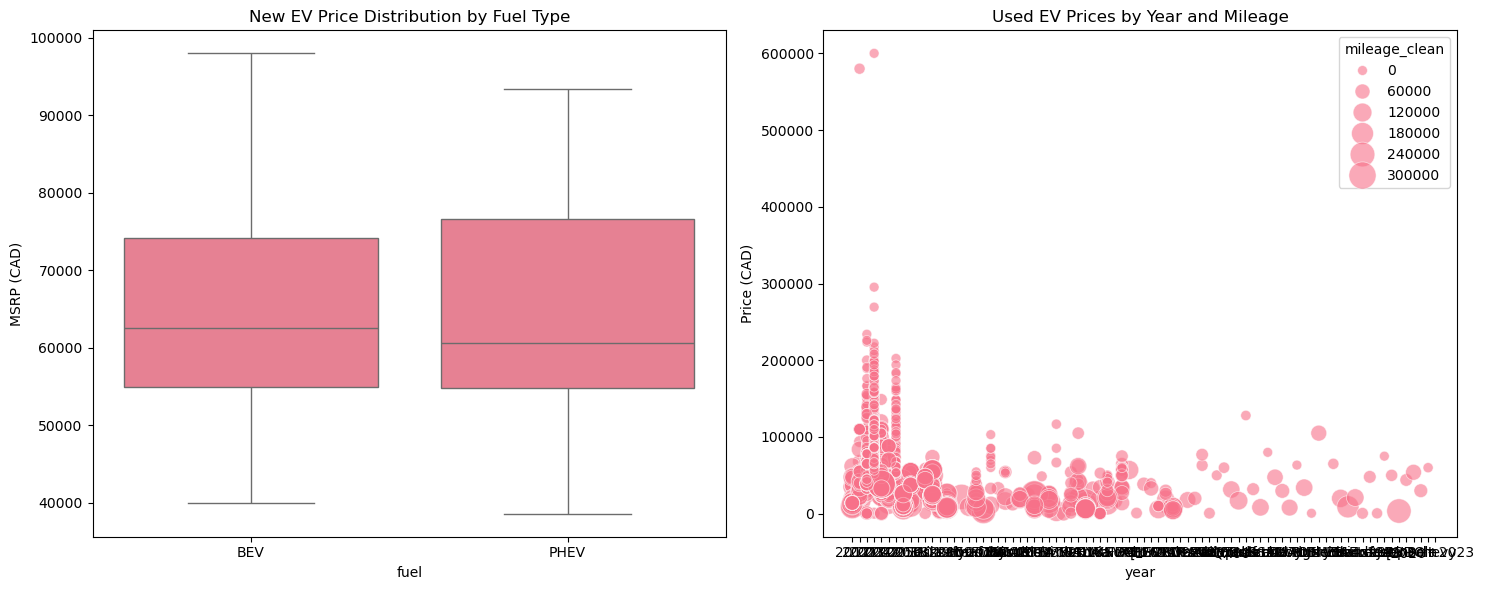

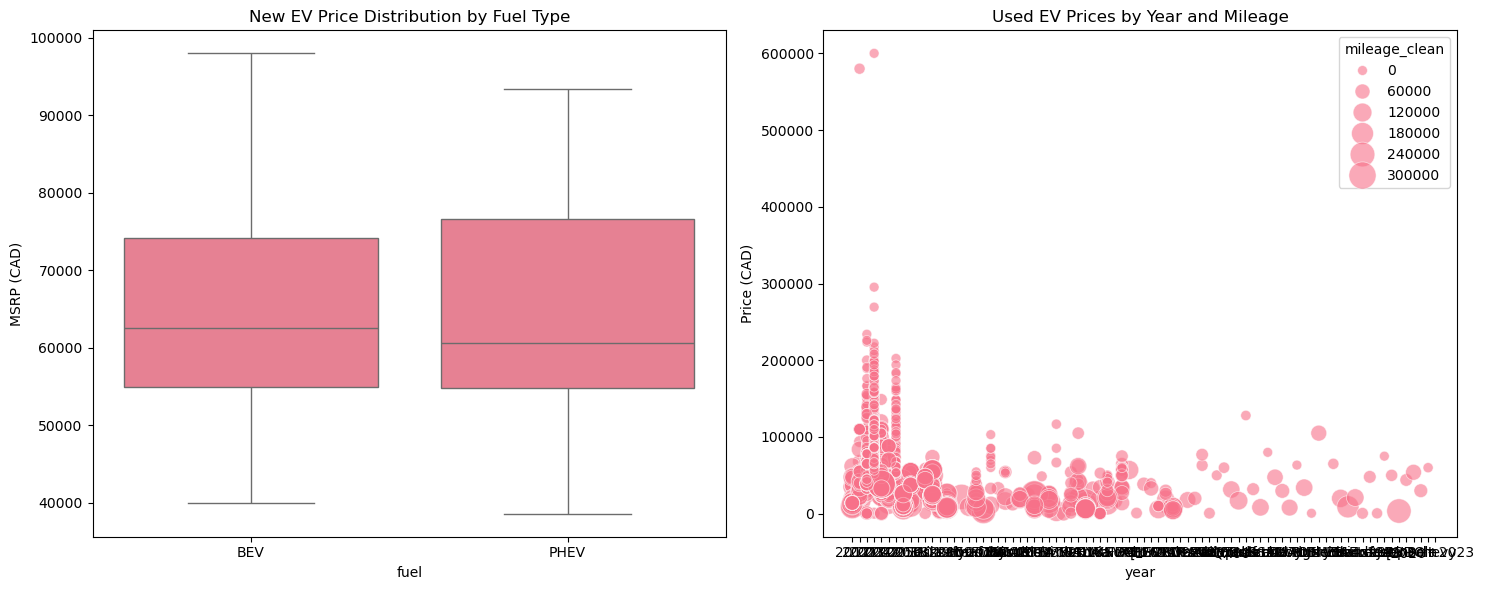

In [15]:
def plot_price_distribution():
    """
    Research Question 1: What are the key factors contributing to the high cost of EV ownership?
    Analyzing new vs used EV price distributions
    """
    fig = plt.figure(figsize=(15, 6))

    # New vehicles price distribution
    ax1 = plt.subplot(1, 2, 1)
    data = plugndrive_vehicles[plugndrive_vehicles['msrp'] < 100000]
    sns.boxplot(data=data, y='msrp', x='fuel', ax=ax1)
    ax1.set_title('New EV Price Distribution by Fuel Type')
    ax1.set_ylabel('MSRP (CAD)')

    # Used vehicles price distribution
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(data=kijiji_data,
                    x='year',
                    y='price_clean',
                    size='mileage_clean',
                    sizes=(50, 400),
                    alpha=0.6,
                    ax=ax2)
    ax2.set_title('Used EV Prices by Year and Mileage')
    ax2.set_ylabel('Price (CAD)')

    plt.tight_layout()
    return fig

plot_price_distribution()

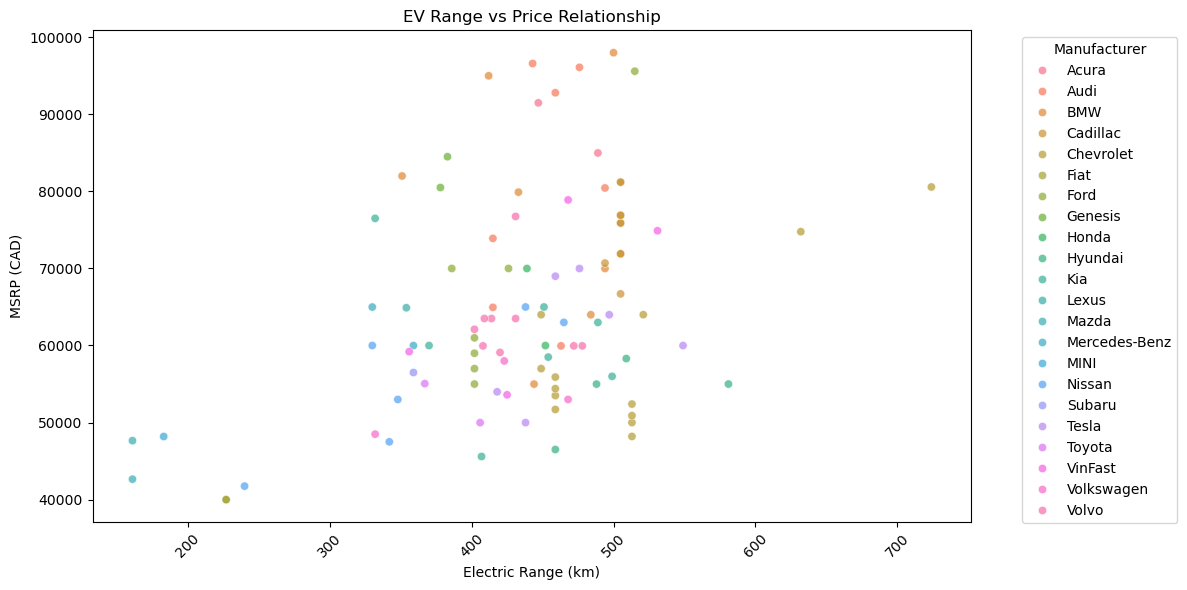

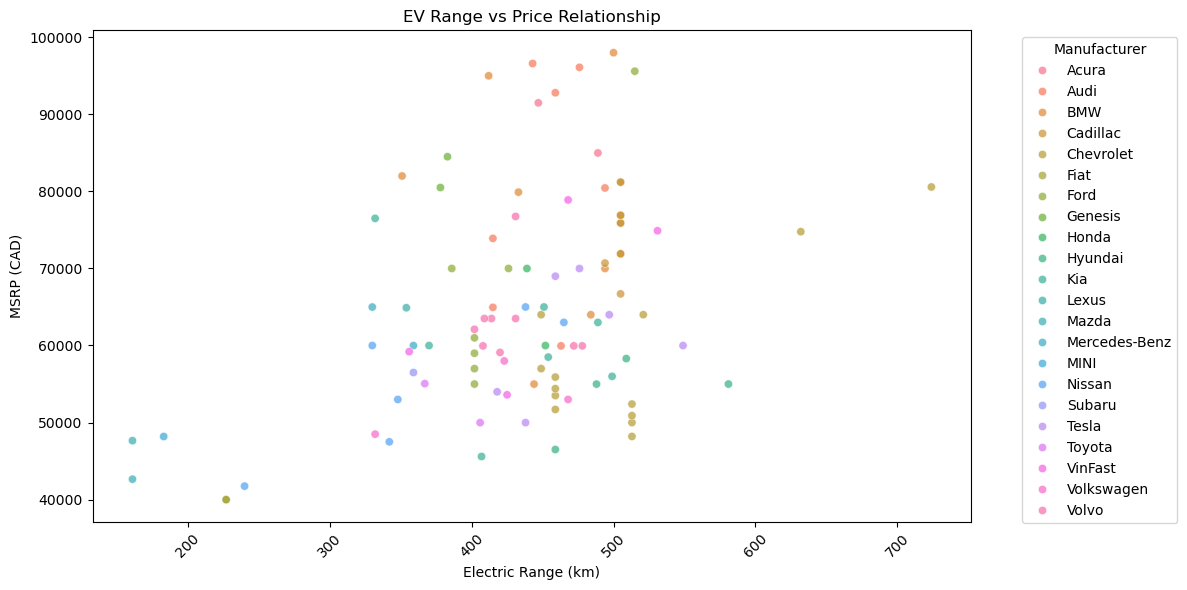

In [16]:
def plot_range_price_relationship():
    """
    Analyzing the relationship between range and price
    """
    fig = plt.figure(figsize=(12, 6))

    # Filter for BEVs only and remove extreme prices
    bev_data = plugndrive_vehicles[
        (plugndrive_vehicles['fuel'] == 'BEV') &
        (plugndrive_vehicles['msrp'] < 100000)
        ]

    sns.scatterplot(data=bev_data,
                    x='electric_range',
                    y='msrp',
                    hue='make',
                    alpha=0.7)

    plt.title('EV Range vs Price Relationship')
    plt.xlabel('Electric Range (km)')
    plt.ylabel('MSRP (CAD)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Manufacturer')
    plt.tight_layout()
    return fig

plot_range_price_relationship()

/var/folders/43/9f2bqzb13f58kthgs4zygq1w0000gn/T/ipykernel_76061/1852566252.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bev_data['price_per_km'] = bev_data['msrp'] / bev_data['electric_range']


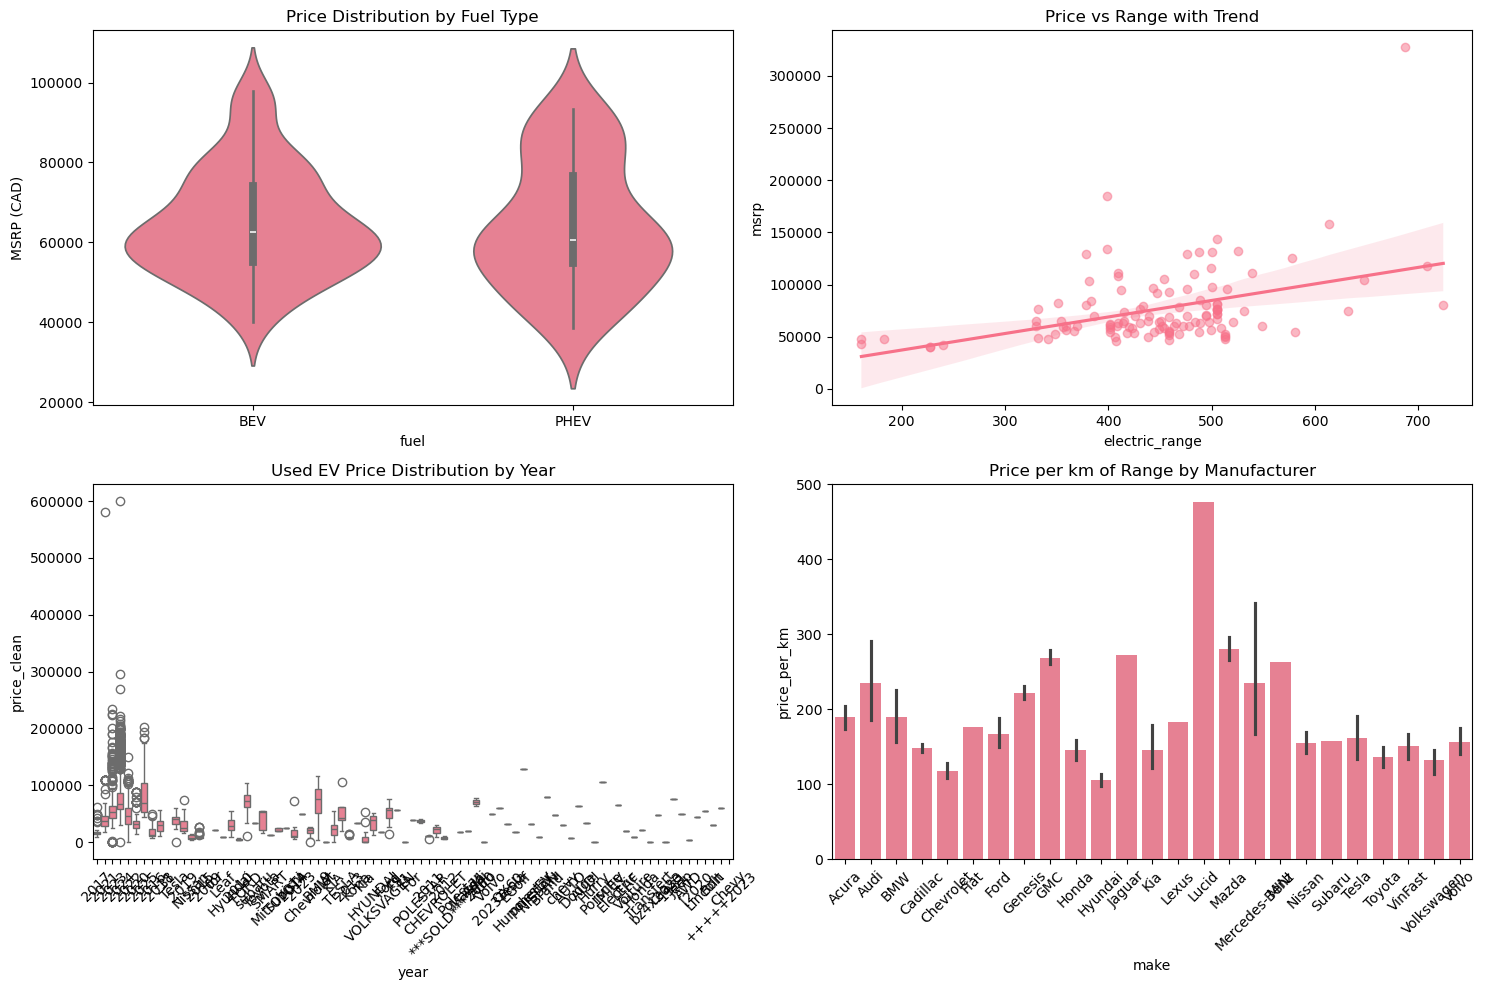

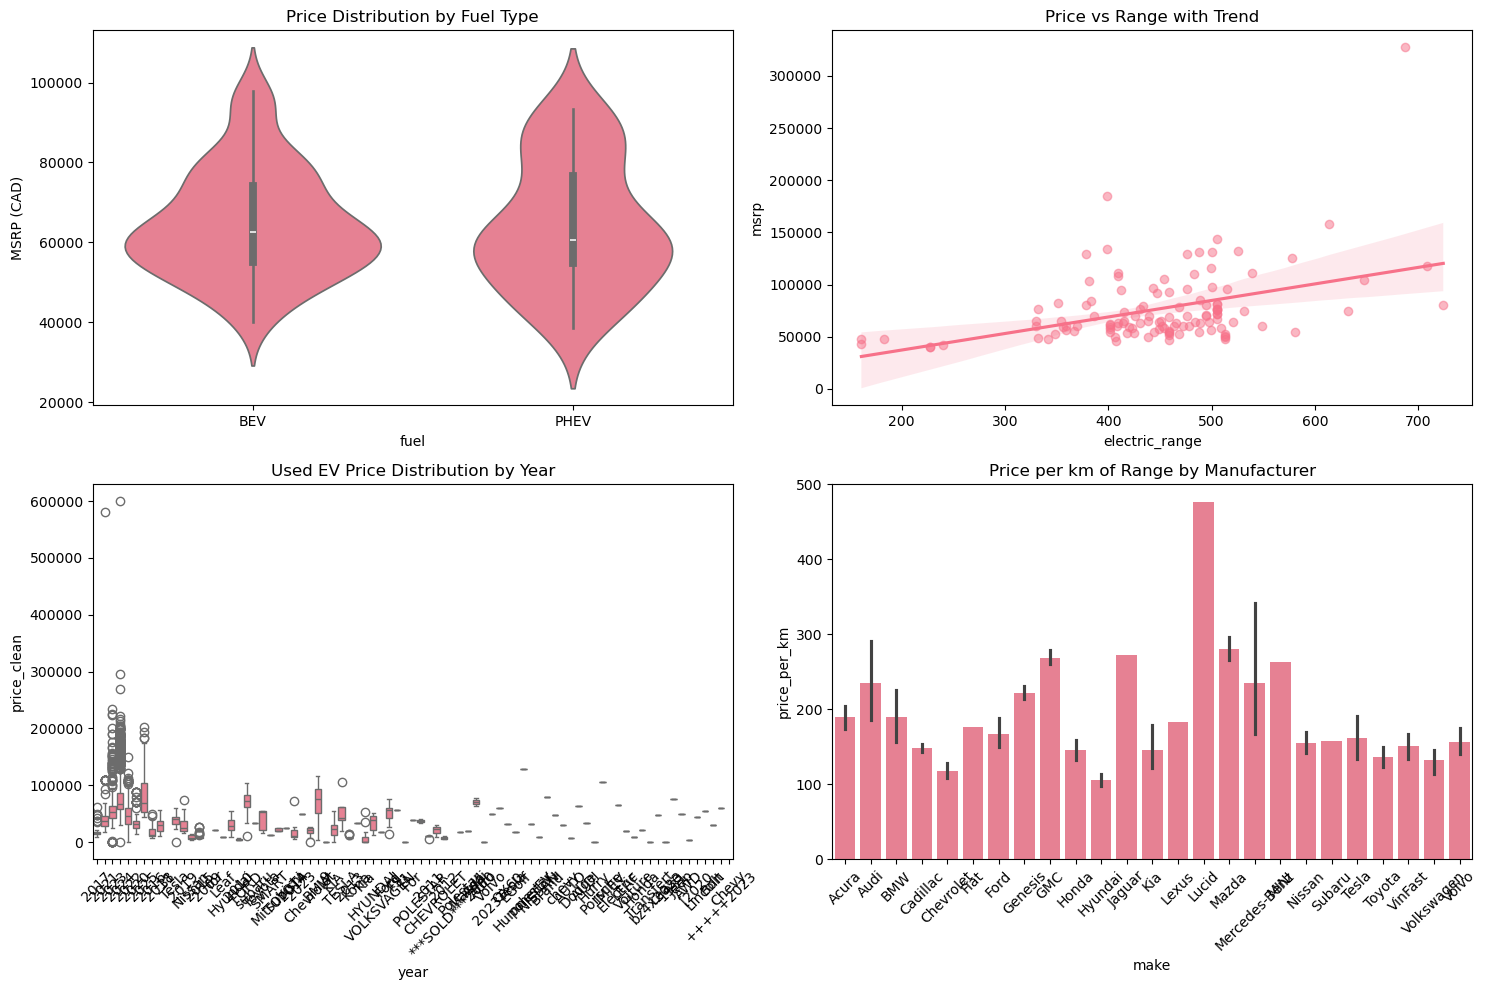

In [17]:
def plot_price_trends():
    """
    Advanced price trend analysis
    """
    fig = plt.figure(figsize=(15, 10))

    # Price distribution by manufacturer and fuel type
    ax1 = plt.subplot(2, 2, 1)
    sns.violinplot(data=plugndrive_vehicles[plugndrive_vehicles['msrp'] < 100000],
                   x='fuel', y='msrp', ax=ax1)
    ax1.set_title('Price Distribution by Fuel Type')
    ax1.set_ylabel('MSRP (CAD)')

    # Price vs Range with regression line
    ax2 = plt.subplot(2, 2, 2)
    bev_data = plugndrive_vehicles[plugndrive_vehicles['fuel'] == 'BEV']
    sns.regplot(data=bev_data, x='electric_range', y='msrp',
                scatter_kws={'alpha':0.5}, ax=ax2)
    ax2.set_title('Price vs Range with Trend')

    # Price distribution over years (used market)
    ax3 = plt.subplot(2, 2, 3)
    sns.boxplot(data=kijiji_data, x='year', y='price_clean', ax=ax3)
    ax3.set_title('Used EV Price Distribution by Year')
    plt.xticks(rotation=45)

    # Price per km of range
    ax4 = plt.subplot(2, 2, 4)
    bev_data['price_per_km'] = bev_data['msrp'] / bev_data['electric_range']
    sns.barplot(data=bev_data, x='make', y='price_per_km', ax=ax4)
    ax4.set_title('Price per km of Range by Manufacturer')
    plt.xticks(rotation=45)

    plt.tight_layout()
    return fig

plot_price_trends()

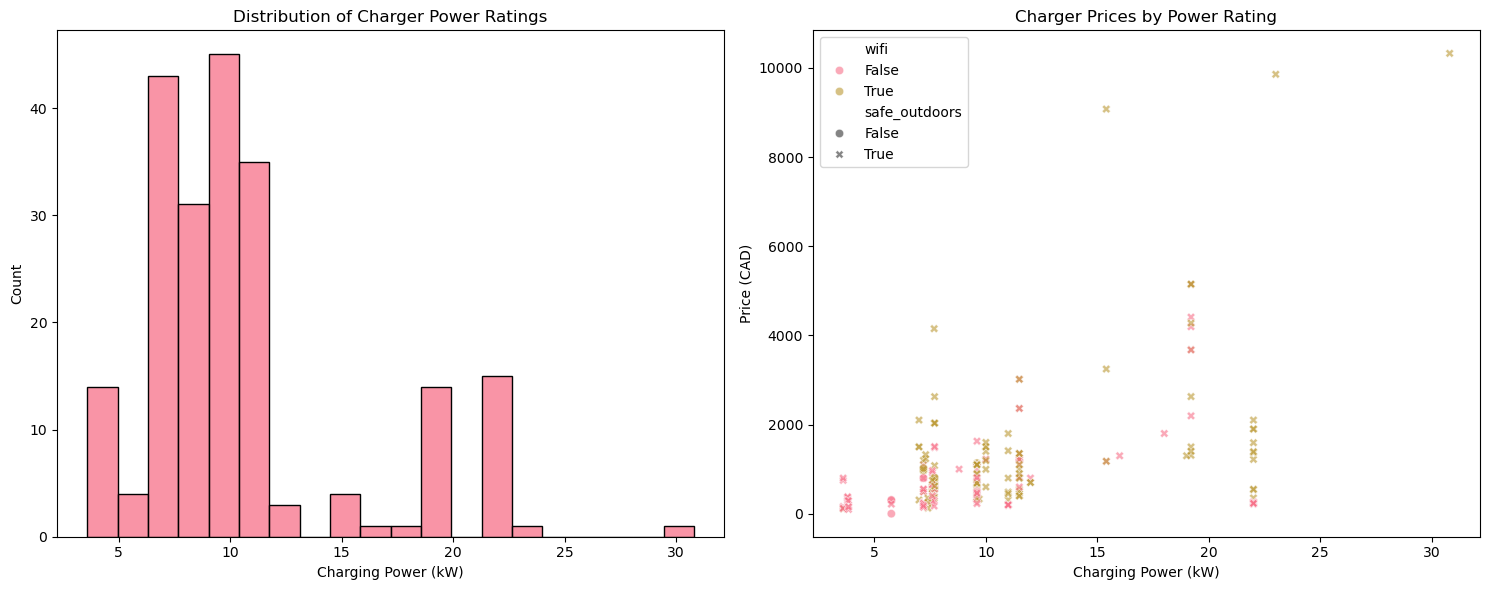

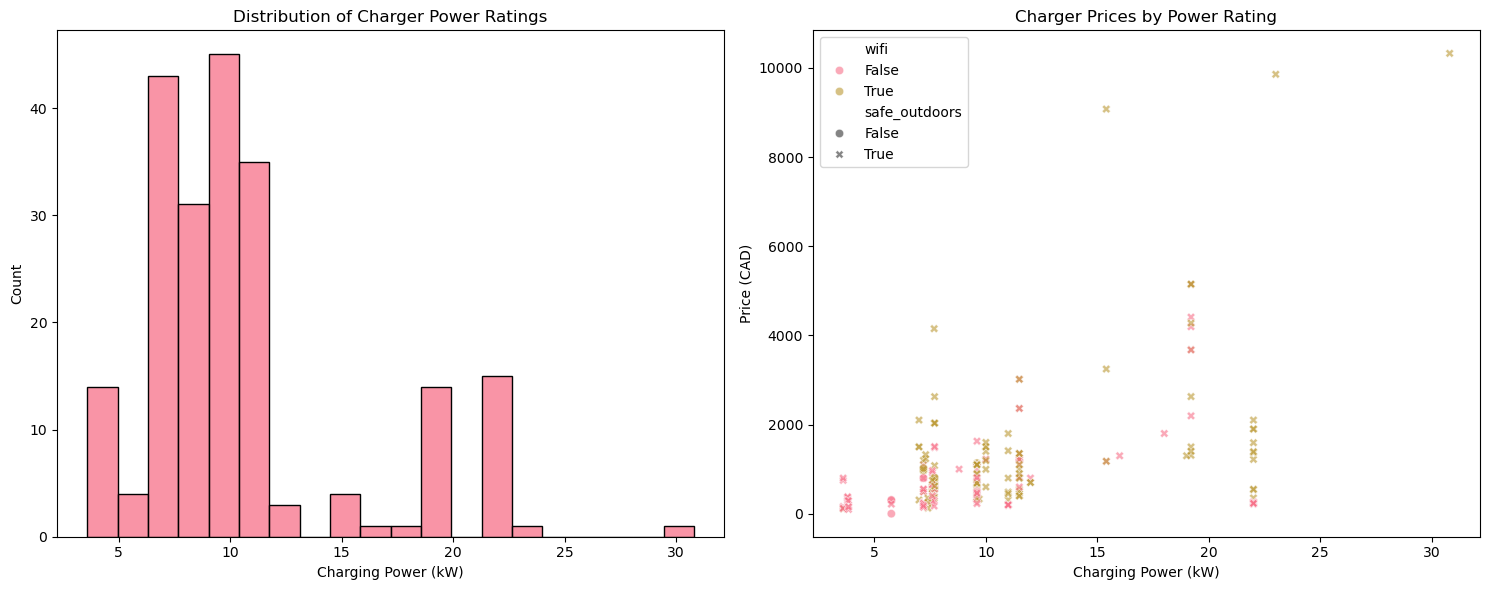

In [18]:
def plot_charging_infrastructure():
    """
    Research Question 2: How does the current charging infrastructure affect EV practicality?
    Analyzing charging capabilities and costs
    """
    fig = plt.figure(figsize=(15, 6))

    # Charging power distribution
    ax1 = plt.subplot(1, 2, 1)
    sns.histplot(data=charger_data, x='kw_ac', bins=20, ax=ax1)
    ax1.set_title('Distribution of Charger Power Ratings')
    ax1.set_xlabel('Charging Power (kW)')

    # Charger prices by power rating
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(data=charger_data,
                    x='kw_ac',
                    y='price',
                    hue='wifi',
                    style='safe_outdoors',
                    alpha=0.6,
                    ax=ax2)
    ax2.set_title('Charger Prices by Power Rating')
    ax2.set_xlabel('Charging Power (kW)')
    ax2.set_ylabel('Price (CAD)')

    plt.tight_layout()
    return fig

plot_charging_infrastructure()

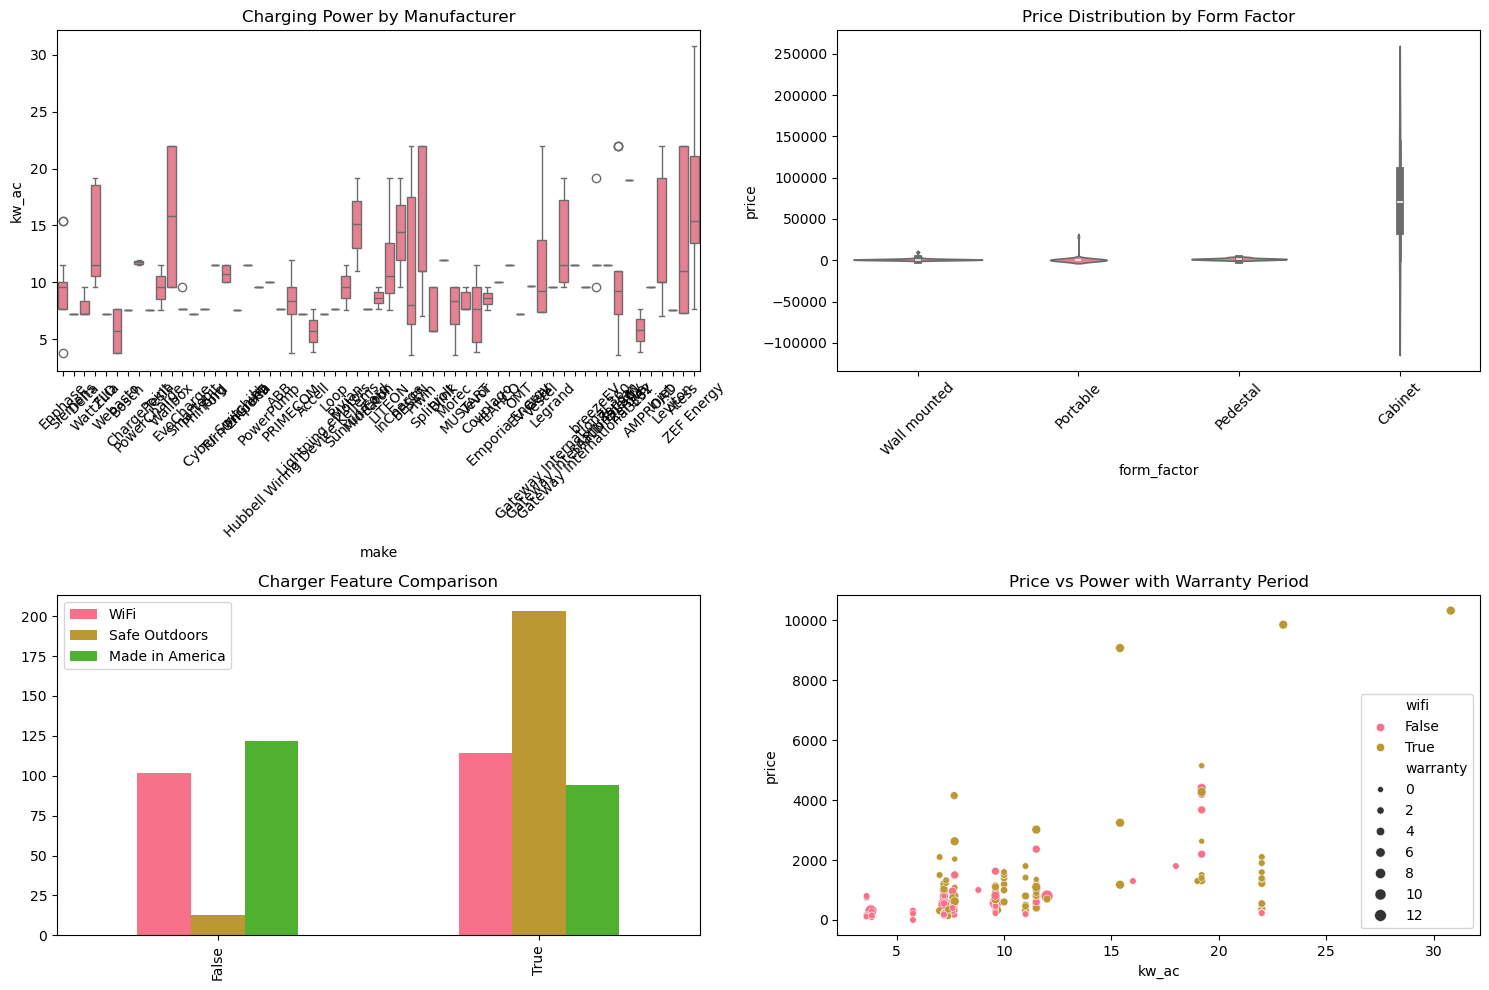

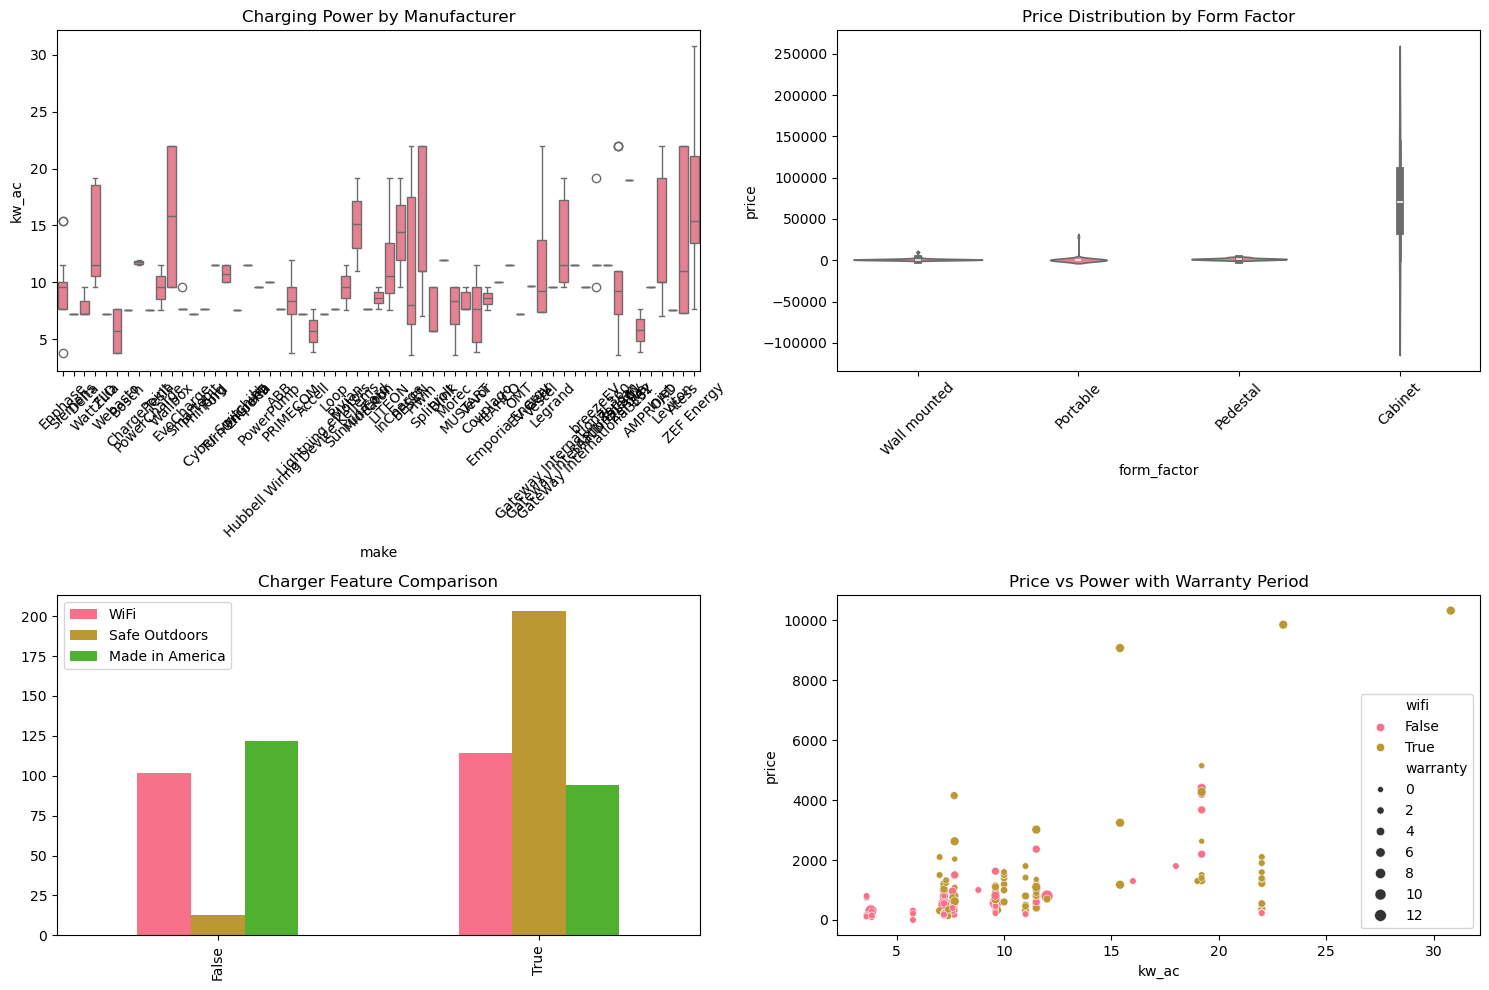

In [19]:
def plot_charging_analysis():
    """
    Enhanced charging infrastructure analysis
    """
    fig = plt.figure(figsize=(15, 10))

    # Charging power by manufacturer
    ax1 = plt.subplot(2, 2, 1)
    sns.boxplot(data=charger_data, x='make', y='kw_ac', ax=ax1)
    ax1.set_title('Charging Power by Manufacturer')
    plt.xticks(rotation=45)

    # Price distribution by form factor
    ax2 = plt.subplot(2, 2, 2)
    sns.violinplot(data=charger_data, x='form_factor', y='price', ax=ax2)
    ax2.set_title('Price Distribution by Form Factor')
    plt.xticks(rotation=45)

    # Feature comparison
    ax3 = plt.subplot(2, 2, 3)
    feature_counts = pd.DataFrame({
        'WiFi': charger_data['wifi'].value_counts(),
        'Safe Outdoors': charger_data['safe_outdoors'].value_counts(),
        'Made in America': charger_data['made_in_america'].value_counts()
    })
    feature_counts.plot(kind='bar', ax=ax3)
    ax3.set_title('Charger Feature Comparison')

    # Price vs Power with warranty indication
    ax4 = plt.subplot(2, 2, 4)
    sns.scatterplot(data=charger_data, x='kw_ac', y='price',
                    size='warranty', hue='wifi', ax=ax4)
    ax4.set_title('Price vs Power with Warranty Period')

    plt.tight_layout()
    return fig

plot_charging_analysis()

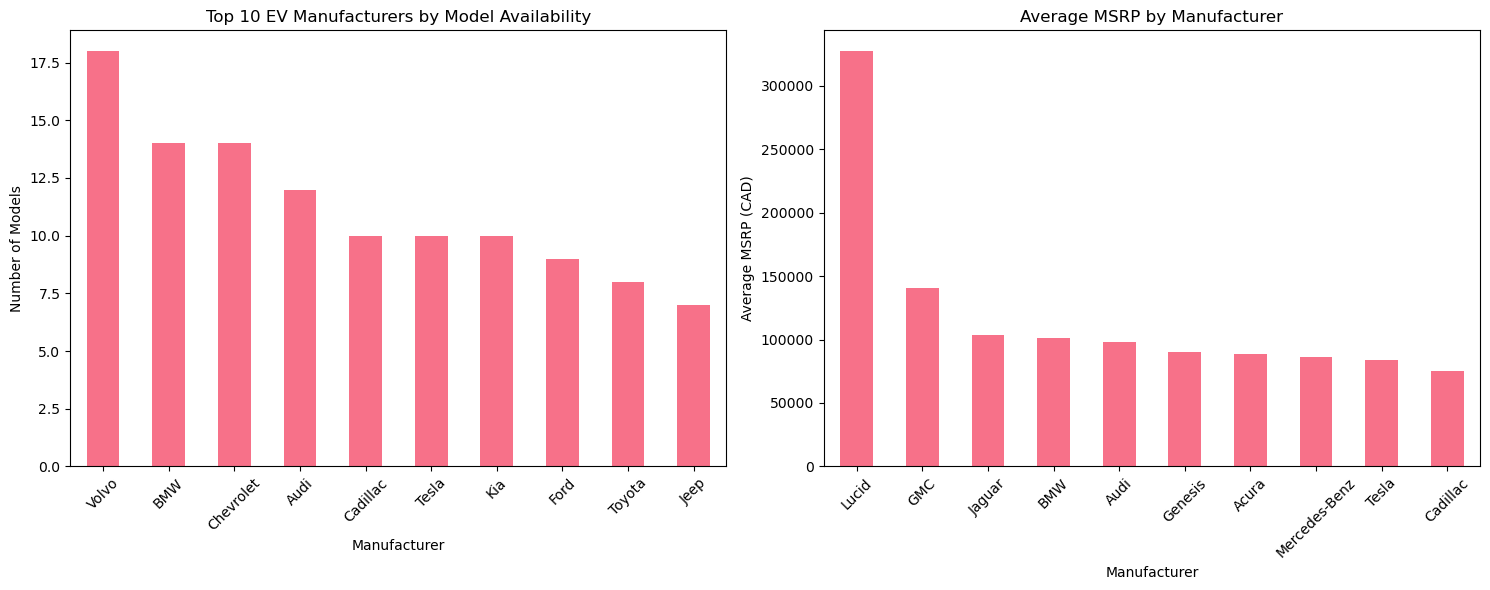

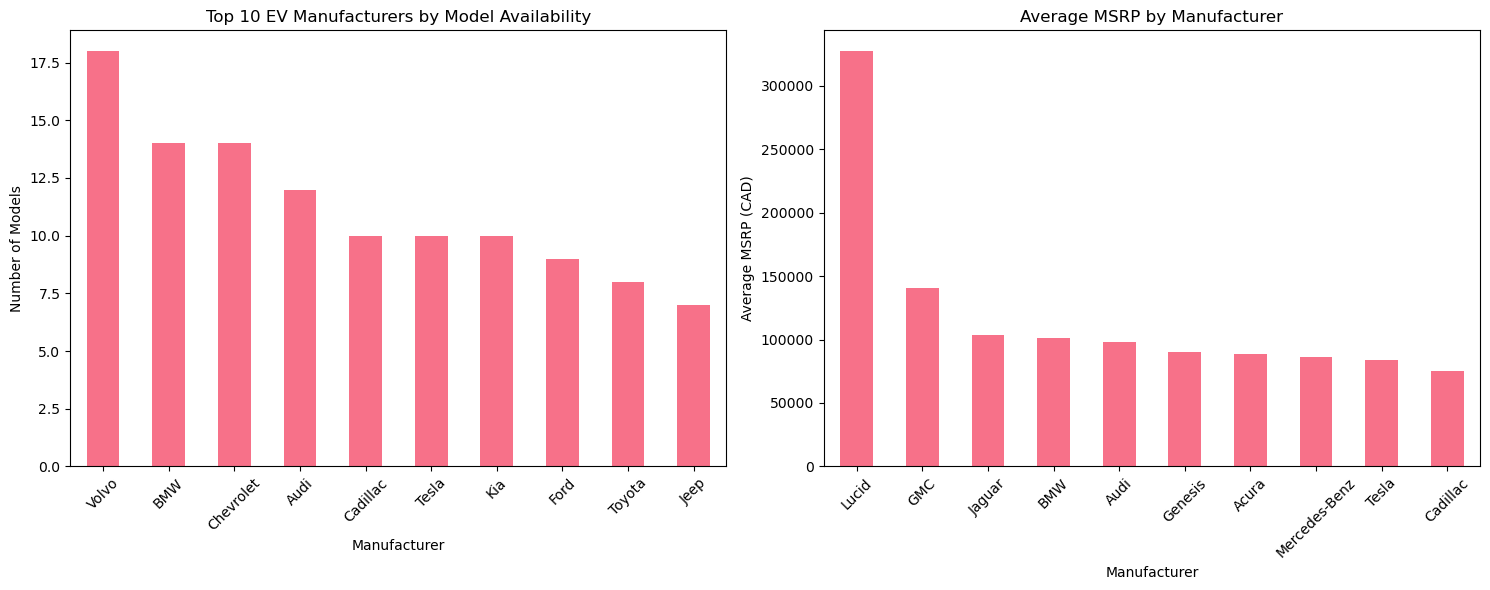

In [20]:
def plot_adoption_trends():
    """
    Analyzing vehicle availability and market trends
    """
    fig = plt.figure(figsize=(15, 6))

    # Count of vehicles by manufacturer
    ax1 = plt.subplot(1, 2, 1)
    make_counts = plugndrive_vehicles['make'].value_counts().head(10)
    make_counts.plot(kind='bar', ax=ax1)
    ax1.set_title('Top 10 EV Manufacturers by Model Availability')
    ax1.set_xlabel('Manufacturer')
    ax1.set_ylabel('Number of Models')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # Average price by manufacturer
    ax2 = plt.subplot(1, 2, 2)
    avg_price = plugndrive_vehicles.groupby('make')['msrp'].mean().sort_values(ascending=False).head(10)
    avg_price.plot(kind='bar', ax=ax2)
    ax2.set_title('Average MSRP by Manufacturer')
    ax2.set_xlabel('Manufacturer')
    ax2.set_ylabel('Average MSRP (CAD)')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    return fig

plot_adoption_trends()

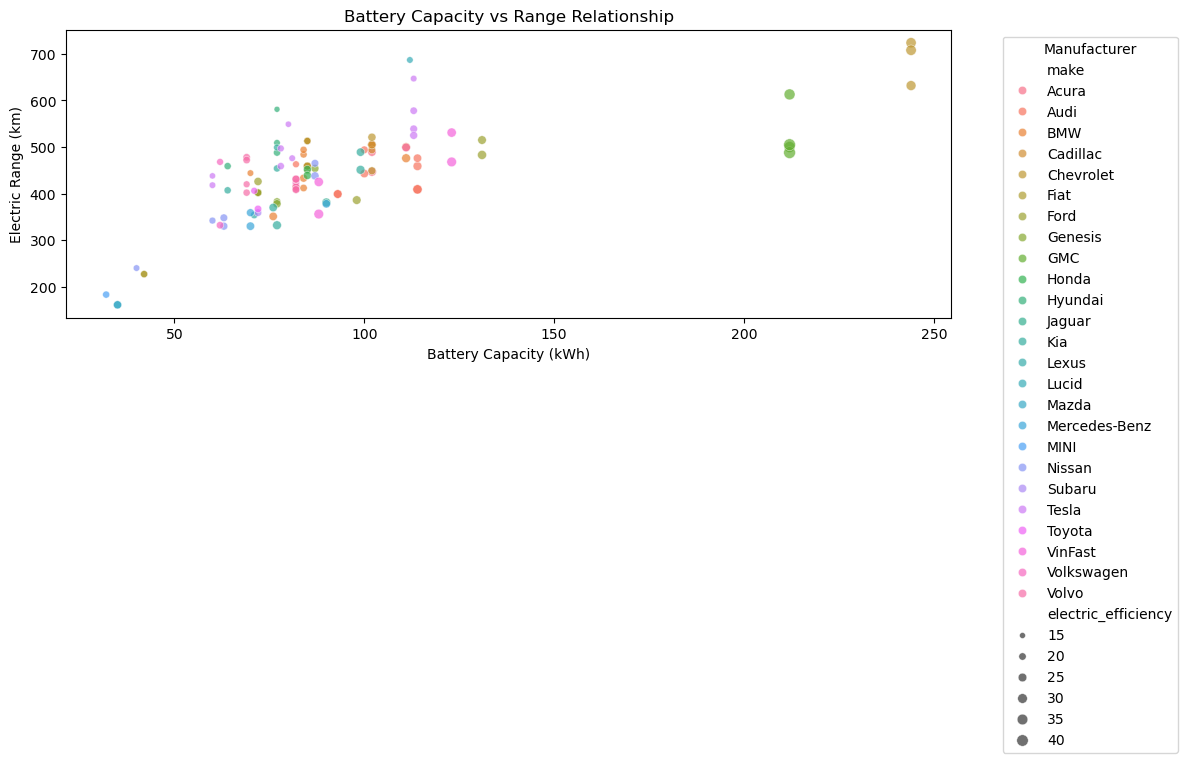

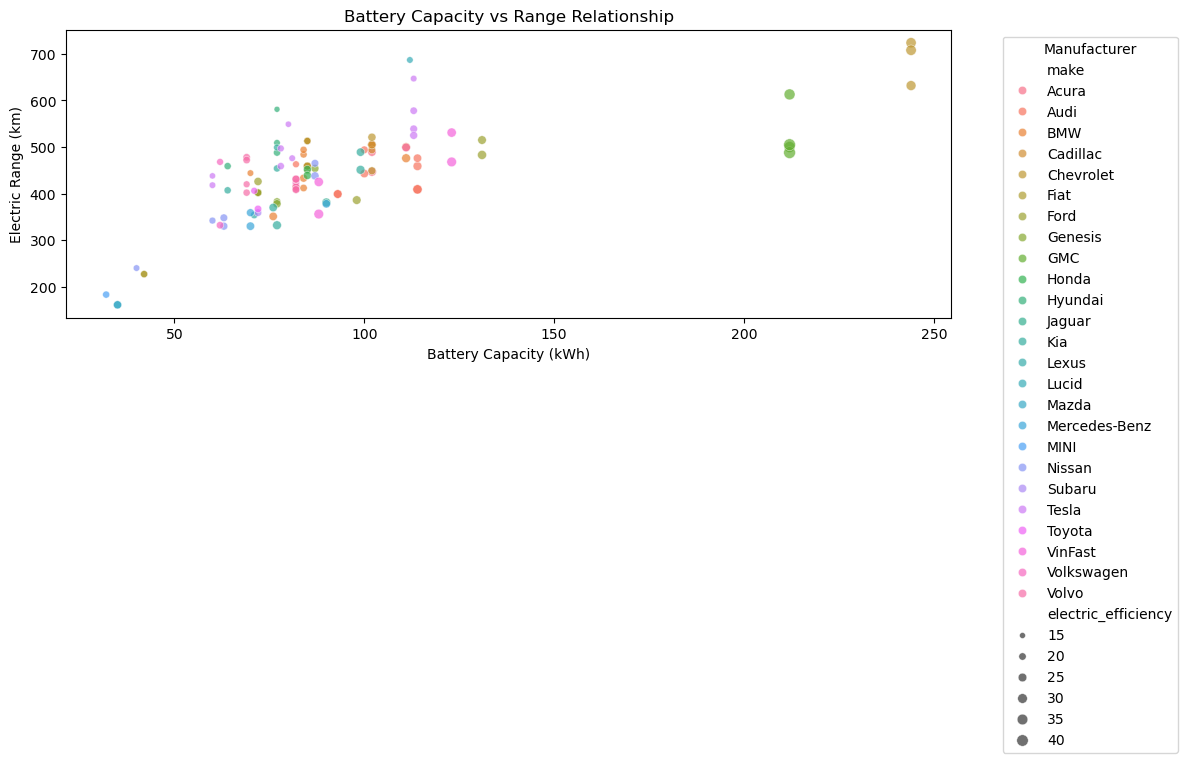

In [21]:
def plot_vehicle_efficiency():
    """
    Analyzing vehicle efficiency and performance metrics
    """
    fig = plt.figure(figsize=(12, 6))

    # Filter BEVs only
    bev_data = plugndrive_vehicles[plugndrive_vehicles['fuel'] == 'BEV']

    sns.scatterplot(data=bev_data,
                    x='battery_capacity',
                    y='electric_range',
                    size='electric_efficiency',
                    hue='make',
                    alpha=0.7)

    plt.title('Battery Capacity vs Range Relationship')
    plt.xlabel('Battery Capacity (kWh)')
    plt.ylabel('Electric Range (km)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Manufacturer')
    plt.tight_layout()
    return fig

plot_vehicle_efficiency()

/var/folders/43/9f2bqzb13f58kthgs4zygq1w0000gn/T/ipykernel_76061/1204071621.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bev_data['range_ratio'] = bev_data['electric_range'] / bev_data['battery_capacity']


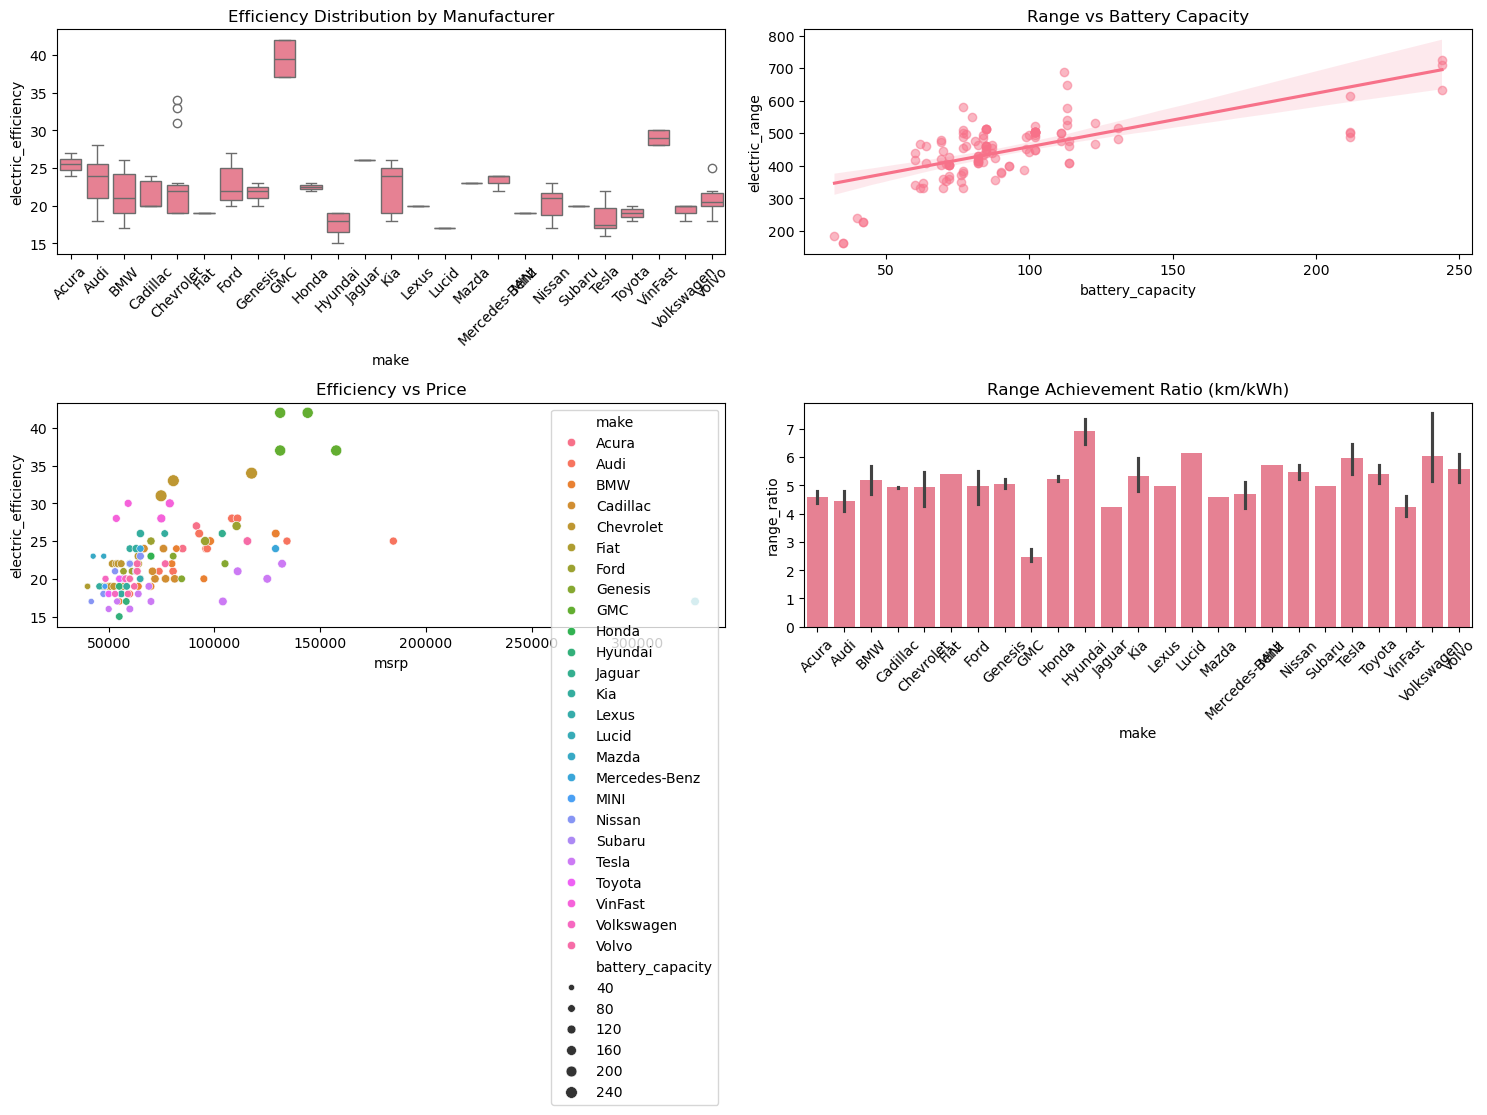

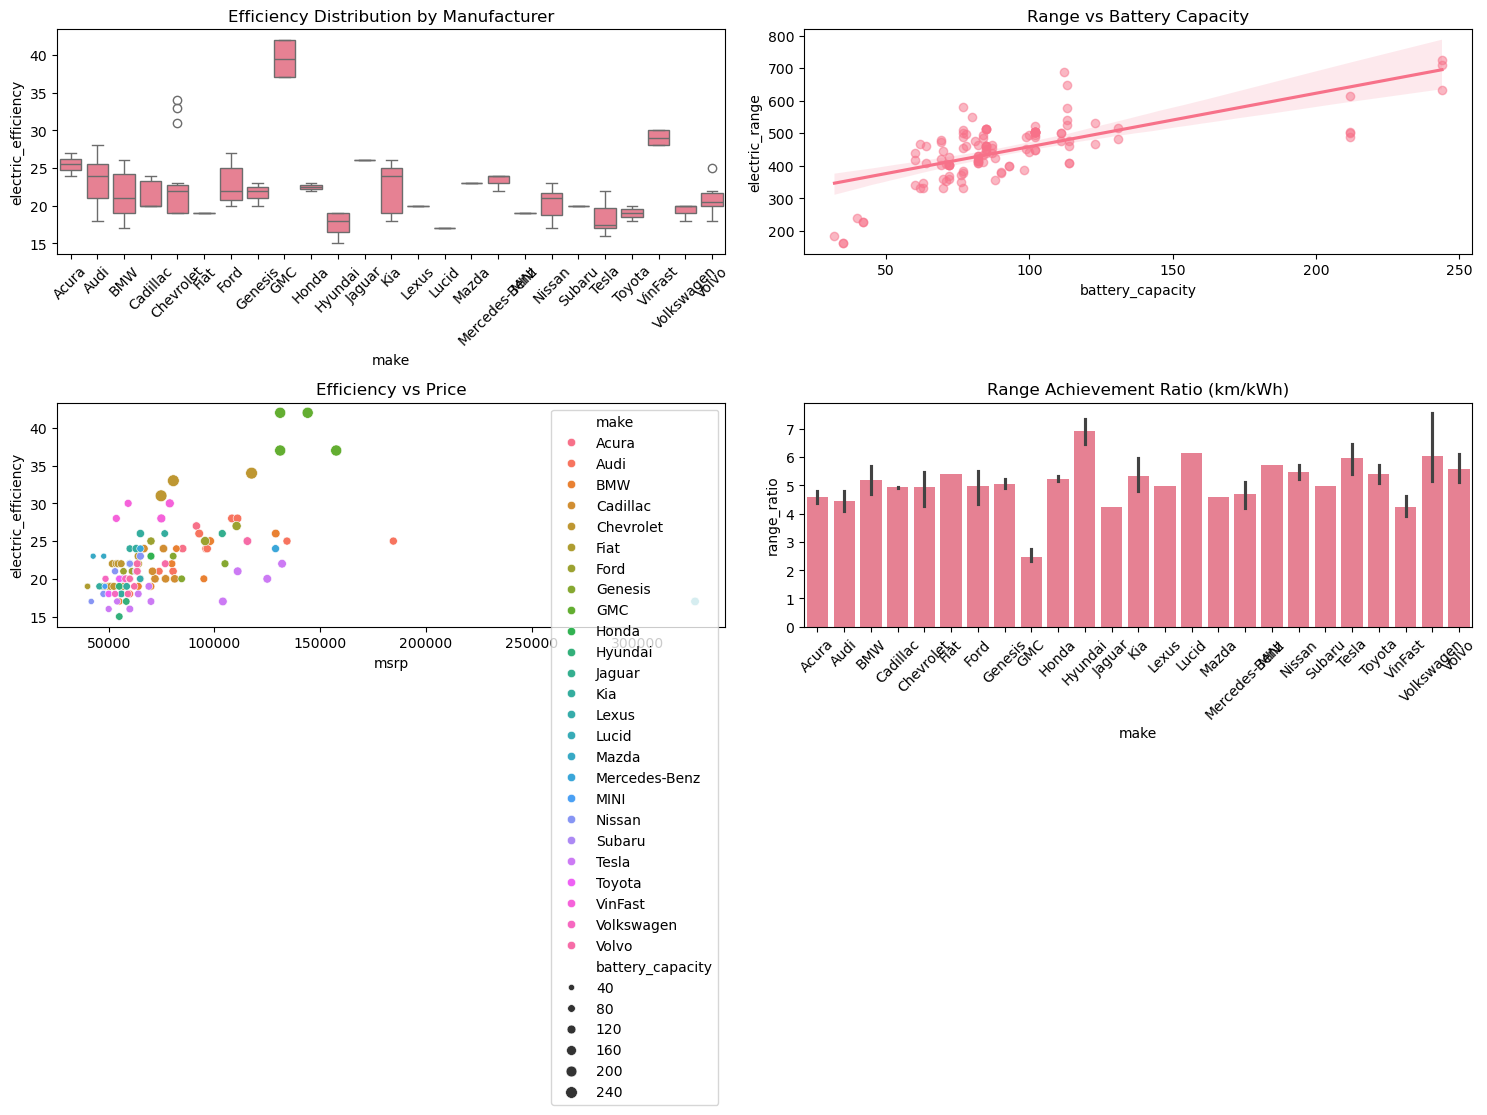

In [22]:
def plot_efficiency_analysis():
    """
    Detailed efficiency metrics analysis
    """
    fig = plt.figure(figsize=(15, 10))

    # Efficiency distribution by manufacturer
    ax1 = plt.subplot(2, 2, 1)
    bev_data = plugndrive_vehicles[plugndrive_vehicles['fuel'] == 'BEV']
    sns.boxplot(data=bev_data, x='make', y='electric_efficiency', ax=ax1)
    ax1.set_title('Efficiency Distribution by Manufacturer')
    plt.xticks(rotation=45)

    # Range vs Battery Capacity with trend
    ax2 = plt.subplot(2, 2, 2)
    sns.regplot(data=bev_data, x='battery_capacity', y='electric_range',
                scatter_kws={'alpha':0.5}, ax=ax2)
    ax2.set_title('Range vs Battery Capacity')

    # Efficiency vs Price
    ax3 = plt.subplot(2, 2, 3)
    sns.scatterplot(data=bev_data, x='msrp', y='electric_efficiency',
                    hue='make', size='battery_capacity', ax=ax3)
    ax3.set_title('Efficiency vs Price')

    # Range Achievement Ratio
    ax4 = plt.subplot(2, 2, 4)
    bev_data['range_ratio'] = bev_data['electric_range'] / bev_data['battery_capacity']
    sns.barplot(data=bev_data, x='make', y='range_ratio', ax=ax4)
    ax4.set_title('Range Achievement Ratio (km/kWh)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    return fig

plot_efficiency_analysis()

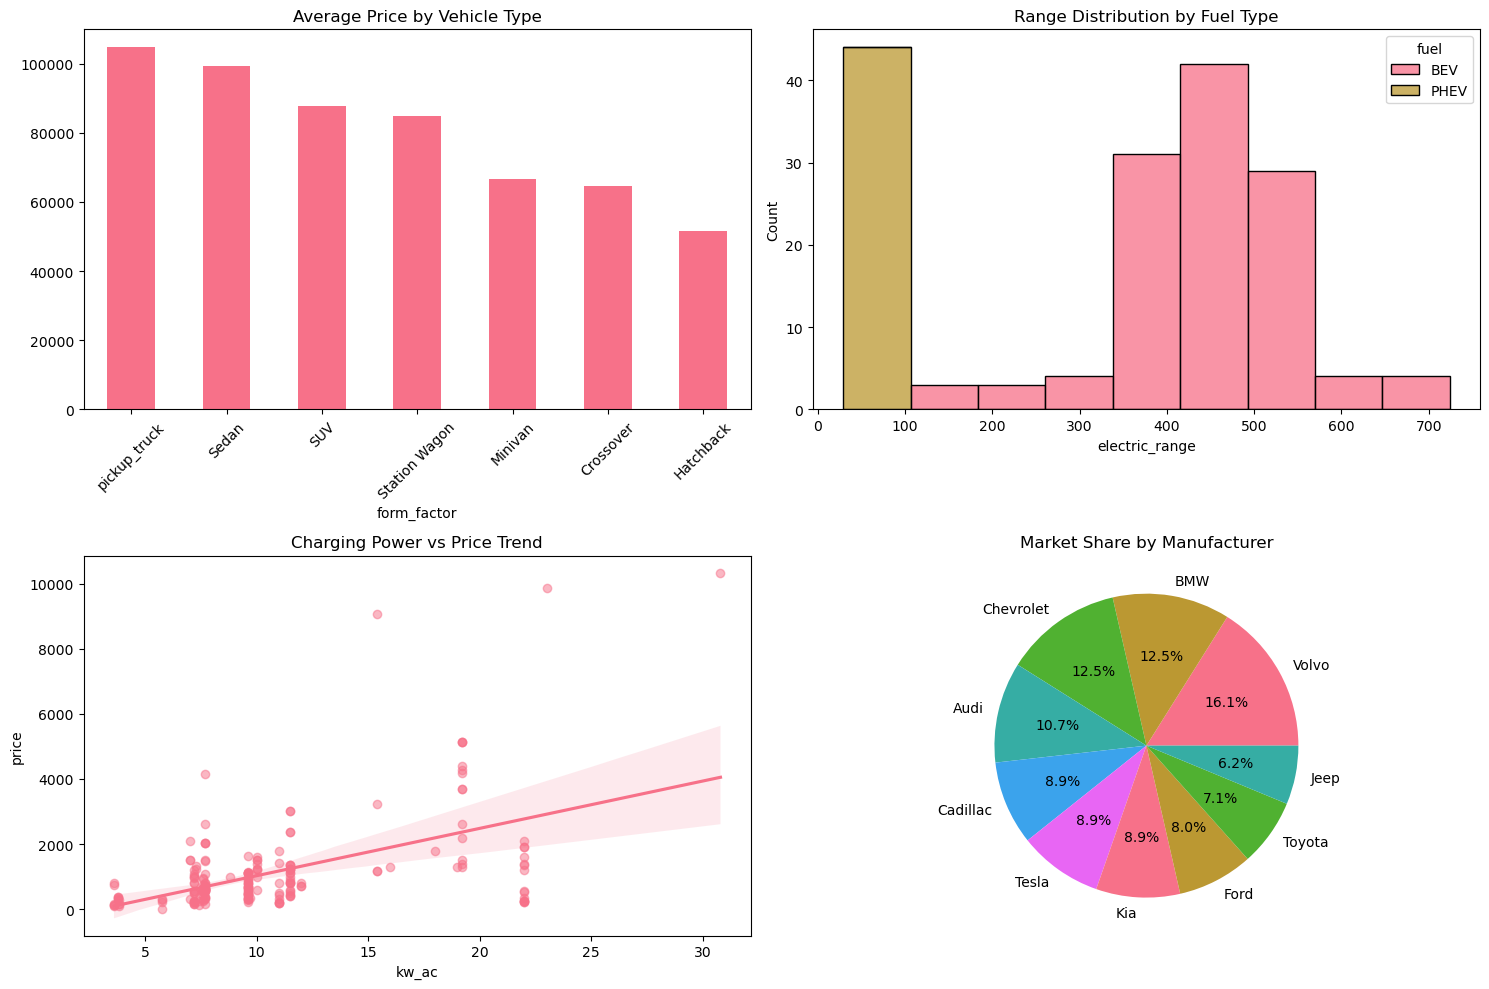

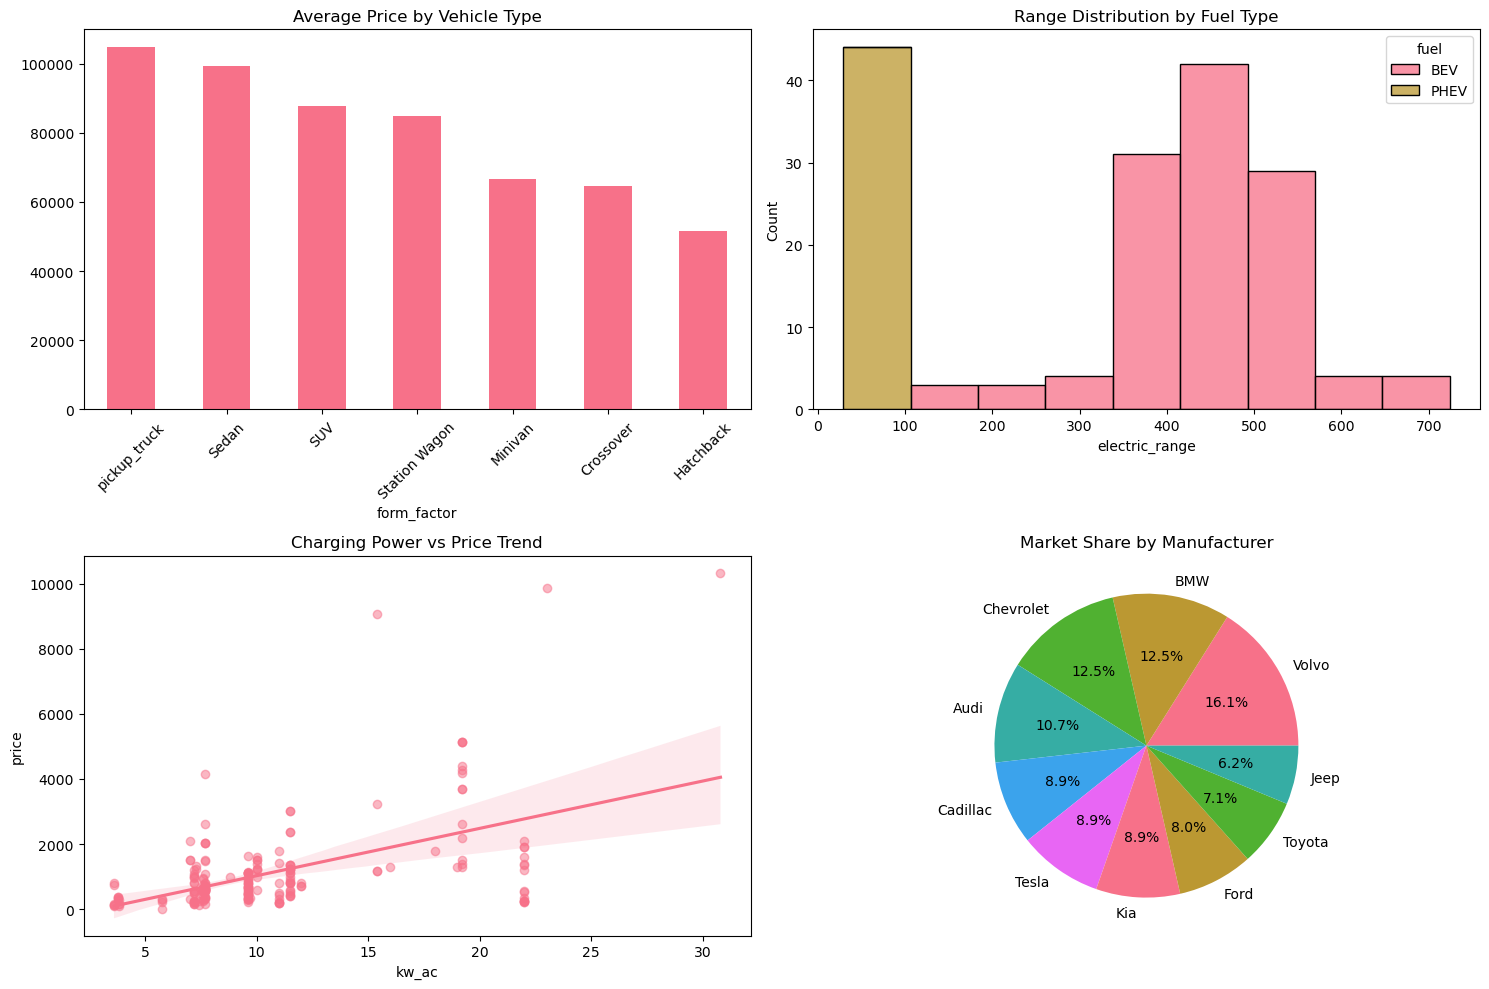

In [23]:
def create_summary_dashboard():
    """
    Create a comprehensive dashboard of key metrics
    """
    fig = plt.figure(figsize=(15, 10))

    # Average prices by vehicle type
    ax1 = plt.subplot(2, 2, 1)
    avg_prices = plugndrive_vehicles.groupby('form_factor')['msrp'].mean().sort_values(ascending=False)
    avg_prices.plot(kind='bar', ax=ax1)
    ax1.set_title('Average Price by Vehicle Type')
    plt.xticks(rotation=45)

    # Range distribution
    ax2 = plt.subplot(2, 2, 2)
    sns.histplot(data=plugndrive_vehicles, x='electric_range', hue='fuel',
                 multiple="stack", ax=ax2)
    ax2.set_title('Range Distribution by Fuel Type')

    # Charging power vs price trend
    ax3 = plt.subplot(2, 2, 3)
    sns.regplot(data=charger_data, x='kw_ac', y='price',
                scatter_kws={'alpha':0.5}, ax=ax3)
    ax3.set_title('Charging Power vs Price Trend')

    # Market share by manufacturer
    ax4 = plt.subplot(2, 2, 4)
    market_share = plugndrive_vehicles['make'].value_counts().head(10)
    plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%')
    ax4.set_title('Market Share by Manufacturer')

    plt.tight_layout()
    return fig

create_summary_dashboard()

In [24]:
# Generate statistical summaries
price_stats, range_stats, corr_matrix, charger_stats = generate_statistical_summary()


=== Statistical Summary of EV Market Analysis ===

1. New Vehicle Price Statistics by Fuel Type:
      count      mean       std    min   median     max
fuel                                                   
BEV     120  76387.32  35331.43  39995  64925.0  327300
PHEV     44  72200.39  40299.86  38595  61562.5  259000

2. Electric Range Statistics for BEVs:
count    120.00
mean     446.88
std       92.96
min      161.00
25%      402.00
50%      454.00
75%      500.00
max      724.00
Name: electric_range, dtype: float64

3. Correlation Analysis for BEVs:
                      msrp  electric_range  battery_capacity  \
msrp                 1.000           0.417             0.498   
electric_range       0.417           1.000             0.681   
battery_capacity     0.498           0.681             1.000   
electric_efficiency  0.396           0.189             0.781   

                     electric_efficiency  
msrp                               0.396  
electric_range                 

In [25]:
# Create and save all plots
figures = [
    plot_price_distribution(),
    plot_range_price_relationship(),
    plot_charging_infrastructure(),
    plot_adoption_trends(),
    plot_vehicle_efficiency(),
    plot_price_trends(),
    plot_charging_analysis(),
    plot_efficiency_analysis(),
    create_summary_dashboard()
]

# Save all figures
for i, fig in enumerate(figures, 1):
    fig.savefig(f'analysis/ev_analysis_figure_{i}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)

# Save statistical summaries to a text file
with open('analysis/ev_analysis_statistics.txt', 'w') as f:
    f.write("=== EV Market Analysis Statistical Summary ===\n\n")
    f.write("1. Price Statistics by Fuel Type:\n")
    f.write(str(price_stats))
    f.write("\n\n2. Range Statistics for BEVs:\n")
    f.write(str(range_stats))
    f.write("\n\n3. Correlation Matrix:\n")
    f.write(str(corr_matrix.round(3)))
    f.write("\n\n4. Charger Statistics:\n")
    f.write(str(charger_stats))

print("Enhanced analysis completed. All figures and statistics have been saved.")

/var/folders/43/9f2bqzb13f58kthgs4zygq1w0000gn/T/ipykernel_76061/1852566252.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bev_data['price_per_km'] = bev_data['msrp'] / bev_data['electric_range']
/var/folders/43/9f2bqzb13f58kthgs4zygq1w0000gn/T/ipykernel_76061/1204071621.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bev_data['range_ratio'] = bev_data['electric_range'] / bev_data['battery_capacity']


Enhanced analysis completed. All figures and statistics have been saved.


/var/folders/43/9f2bqzb13f58kthgs4zygq1w0000gn/T/ipykernel_76061/412848240.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mileage_band'] = pd.cut(data['mileage_clean'], bins=mileage_bands)
/var/folders/43/9f2bqzb13f58kthgs4zygq1w0000gn/T/ipykernel_76061/412848240.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_stats = data.groupby('mileage_band').agg({


Analysis completed. All figures and statistics have been saved.


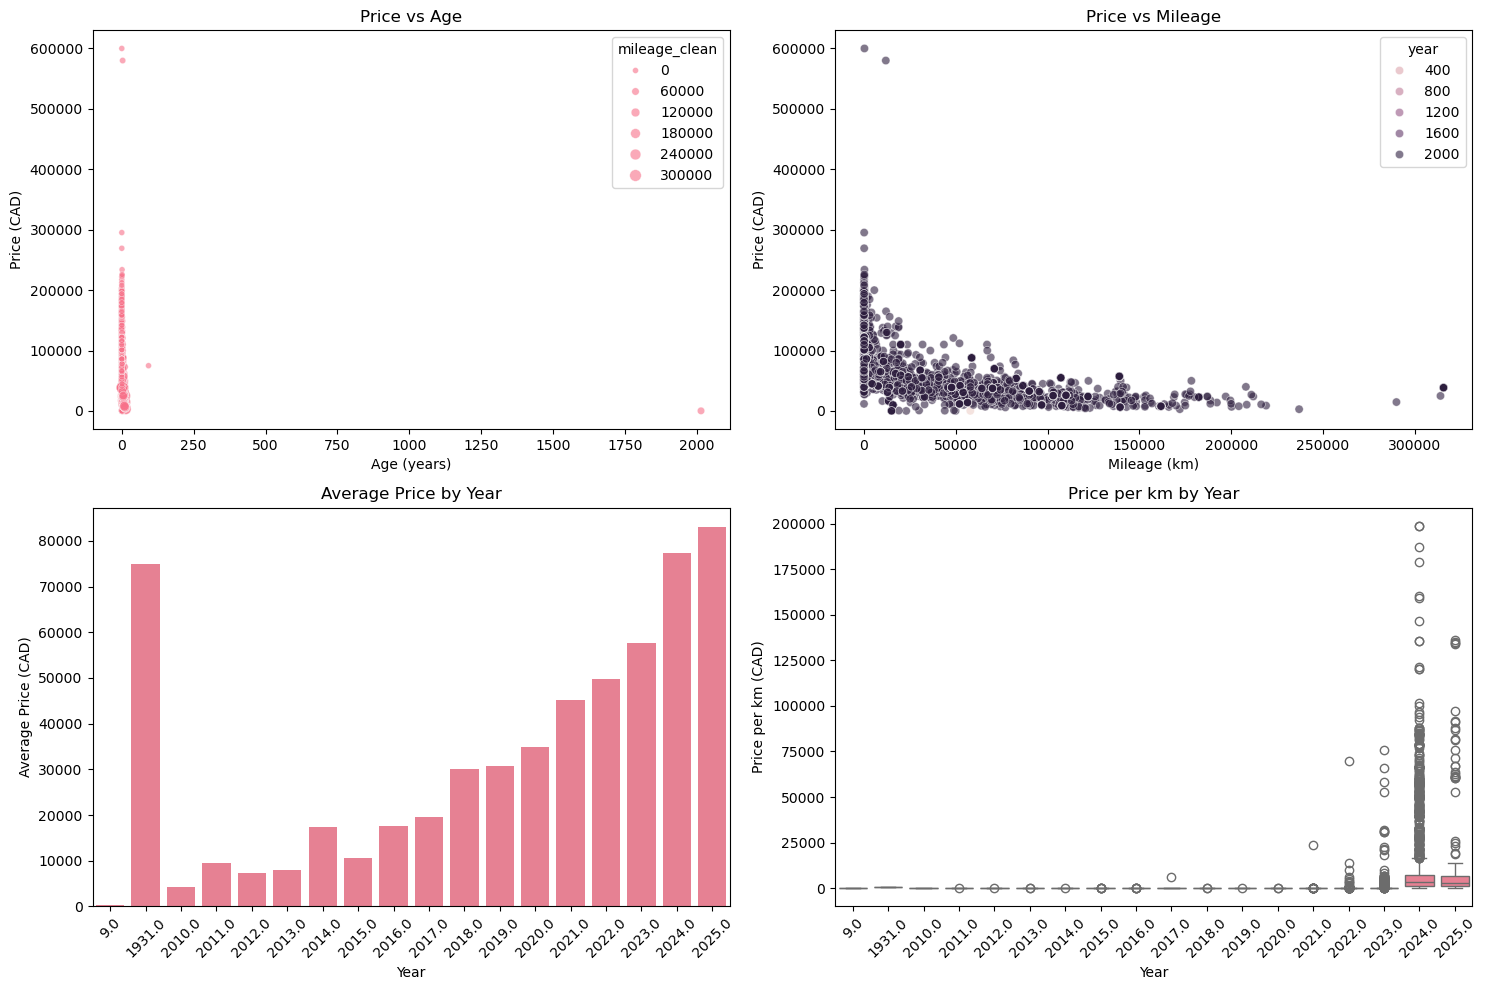

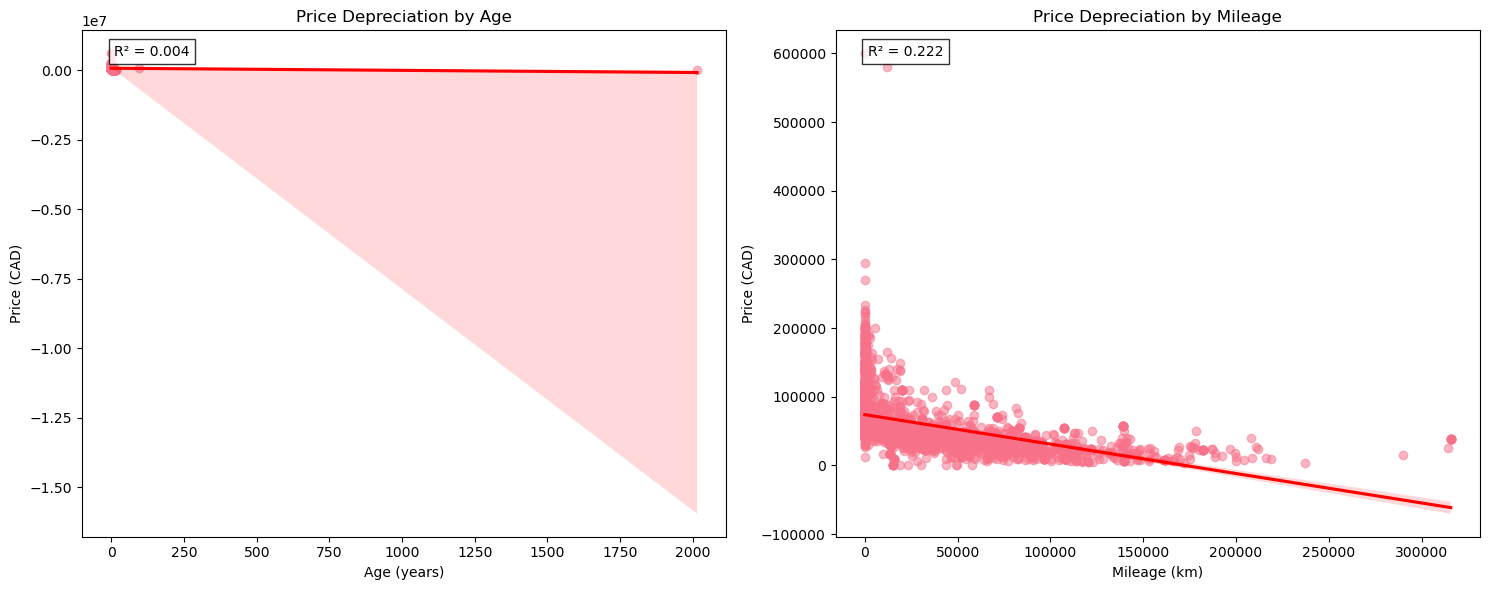

In [26]:
def prepare_depreciation_data():
    """
    Prepare data for depreciation analysis with proper type conversion
    """
    # Convert year to numeric, handling any non-numeric values
    kijiji_data['year'] = pd.to_numeric(kijiji_data['year'], errors='coerce')

    # Calculate vehicle age
    current_year = 2024
    kijiji_data['age'] = current_year - kijiji_data['year']

    # Ensure price and mileage are numeric
    kijiji_data['price_clean'] = pd.to_numeric(kijiji_data['price_clean'], errors='coerce')
    kijiji_data['mileage_clean'] = pd.to_numeric(kijiji_data['mileage_clean'], errors='coerce')

    # Calculate price per km (adding 1 to avoid division by zero)
    kijiji_data['price_per_km'] = kijiji_data['price_clean'] / (kijiji_data['mileage_clean'] + 1)

    # Remove any rows with NaN values
    clean_data = kijiji_data.dropna(subset=['year', 'price_clean', 'mileage_clean', 'age'])

    return clean_data

def analyze_price_trends():
    """
    Analyze and visualize price trends
    """
    data = prepare_depreciation_data()

    fig = plt.figure(figsize=(15, 10))

    # 1. Price vs Age Scatter Plot
    ax1 = plt.subplot(2, 2, 1)
    sns.scatterplot(data=data,
                    x='age',
                    y='price_clean',
                    size='mileage_clean',
                    alpha=0.6,
                    ax=ax1)
    ax1.set_title('Price vs Age')
    ax1.set_xlabel('Age (years)')
    ax1.set_ylabel('Price (CAD)')

    # 2. Price vs Mileage
    ax2 = plt.subplot(2, 2, 2)
    sns.scatterplot(data=data,
                    x='mileage_clean',
                    y='price_clean',
                    hue='year',
                    alpha=0.6,
                    ax=ax2)
    ax2.set_title('Price vs Mileage')
    ax2.set_xlabel('Mileage (km)')
    ax2.set_ylabel('Price (CAD)')

    # 3. Average Price by Year
    ax3 = plt.subplot(2, 2, 3)
    yearly_avg = data.groupby('year')['price_clean'].mean().reset_index()
    sns.barplot(data=yearly_avg,
                x='year',
                y='price_clean',
                ax=ax3)
    ax3.set_title('Average Price by Year')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Average Price (CAD)')
    plt.xticks(rotation=45)

    # 4. Price per km by Year
    ax4 = plt.subplot(2, 2, 4)
    sns.boxplot(data=data,
                x='year',
                y='price_per_km',
                ax=ax4)
    ax4.set_title('Price per km by Year')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Price per km (CAD)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    return fig, data

def calculate_depreciation_stats(data):
    """
    Calculate depreciation statistics
    """
    stats_dict = {
        'yearly_stats': {},
        'mileage_stats': {},
        'correlations': {}
    }

    # Yearly price statistics
    yearly_stats = data.groupby('year').agg({
        'price_clean': ['count', 'mean', 'std', 'min', 'max'],
        'mileage_clean': 'mean'
    }).round(2)
    stats_dict['yearly_stats'] = yearly_stats

    # Price depreciation by mileage bands
    mileage_bands = [0, 20000, 50000, 100000, float('inf')]
    data['mileage_band'] = pd.cut(data['mileage_clean'], bins=mileage_bands)
    mileage_stats = data.groupby('mileage_band').agg({
        'price_clean': ['count', 'mean', 'std', 'min', 'max']
    }).round(2)
    stats_dict['mileage_stats'] = mileage_stats

    # Correlations
    correlations = data[['price_clean', 'mileage_clean', 'age', 'year']].corr()
    stats_dict['correlations'] = correlations

    return stats_dict

def plot_depreciation_curves():
    """
    Create depreciation curve analysis
    """
    data = prepare_depreciation_data()

    fig = plt.figure(figsize=(15, 6))

    # 1. Depreciation by Age
    ax1 = plt.subplot(1, 2, 1)
    sns.regplot(data=data,
                x='age',
                y='price_clean',
                scatter_kws={'alpha':0.5},
                line_kws={'color': 'red'},
                ax=ax1)
    ax1.set_title('Price Depreciation by Age')
    ax1.set_xlabel('Age (years)')
    ax1.set_ylabel('Price (CAD)')

    # Calculate and add R-squared
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        data['age'],
        data['price_clean']
    )
    ax1.text(0.05, 0.95, f'R² = {r_value**2:.3f}',
             transform=ax1.transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    # 2. Depreciation by Mileage
    ax2 = plt.subplot(1, 2, 2)
    sns.regplot(data=data,
                x='mileage_clean',
                y='price_clean',
                scatter_kws={'alpha':0.5},
                line_kws={'color': 'red'},
                ax=ax2)
    ax2.set_title('Price Depreciation by Mileage')
    ax2.set_xlabel('Mileage (km)')
    ax2.set_ylabel('Price (CAD)')

    # Calculate and add R-squared
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        data['mileage_clean'],
        data['price_clean']
    )
    ax2.text(0.05, 0.95, f'R² = {r_value**2:.3f}',
             transform=ax2.transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    return fig

# Execute analysis
data = prepare_depreciation_data()
trends_fig, clean_data = analyze_price_trends()
depreciation_fig = plot_depreciation_curves()
stats = calculate_depreciation_stats(clean_data)

# Save results
trends_fig.savefig('analysis/ev_price_trends.png', dpi=300, bbox_inches='tight')
depreciation_fig.savefig('analysis/ev_depreciation_curves.png', dpi=300, bbox_inches='tight')

# Save statistical analysis to file
with open('analysis/ev_depreciation_statistics.txt', 'w') as f:
    f.write("=== EV Price Depreciation Analysis ===\n\n")

    f.write("1. Yearly Statistics:\n")
    f.write(str(stats['yearly_stats']))

    f.write("\n\n2. Mileage Band Statistics:\n")
    f.write(str(stats['mileage_stats']))

    f.write("\n\n3. Correlation Analysis:\n")
    f.write(str(stats['correlations'].round(3)))

print("Analysis completed. All figures and statistics have been saved.")